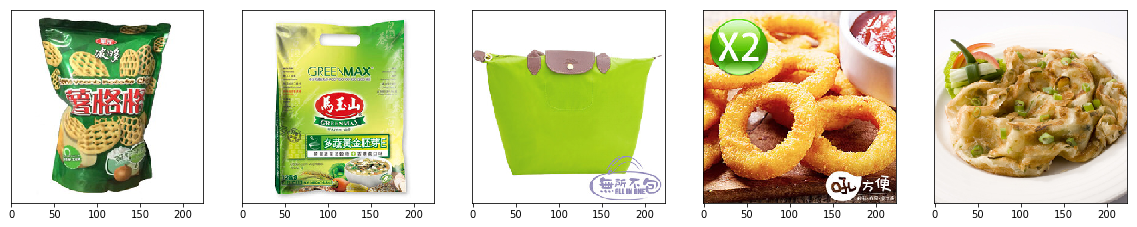

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras.applications.vgg16 as vgg16
import numpy as np

imgs = [
    image.load_img("../../tmp/potato.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/greenmax.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/green_bag.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/onion_ring.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/scallion_pancake.jpg", target_size=(224, 224)) 
]

plt.figure(figsize=(20, 10))
for i, img in enumerate(imgs, start=1):
    plt.subplot(1, 5, i)
    axesImag = plt.imshow(img)
    axesImag.axes.get_yaxis().set_visible(False)
plt.show()

na_imgs = [ image.img_to_array(img) for img in imgs ]    
na_imgs = np.asarray(na_imgs)
na_pp_imgs = vgg16.preprocess_input(na_imgs)

model = vgg16.VGG16(weights='imagenet')
preds = model.predict(na_pp_imgs)
for topk in vgg16.decode_predictions(preds, top=3):
    print([ '{}-{}, {:.3f}'.format(t[0], t[1], t[2]) for t in topk ])

Found 28850 images belonging to 10 classes.
{0: 'n03871628-packet', 1: 'n04204238-shopping_basket', 2: 'n04476259-tray', 3: 'n04542943-waffle_iron', 4: 'n07565083-menu', 5: 'n07579787-plate', 6: 'n07695742-pretzel', 7: 'n07697313-cheeseburger', 8: 'n07697537-hotdog', 9: 'n07831146-carbonara'}
(5, 224, 224, 3)


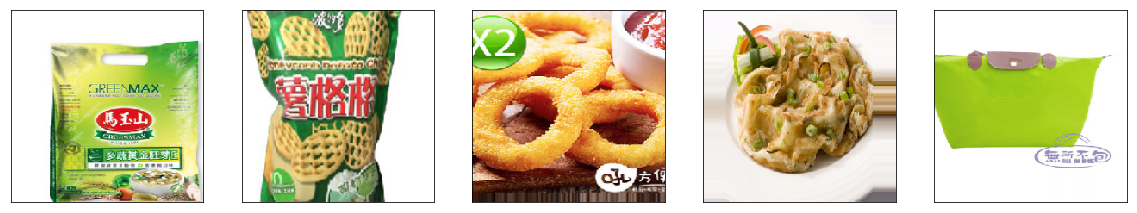

['n03291819-envelope, 0.091']
['n15075141-toilet_tissue, 0.147']
['n03788365-mosquito_net, 0.165']
['n03788365-mosquito_net, 0.050']
['n03788365-mosquito_net, 0.086']

n03871628-packet
n03871628-packet
n07695742-pretzel
n07831146-carbonara
n04204238-shopping_basket


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

imgs = [
    image.load_img("../../tmp/potato.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/greenmax.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/green_bag.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/onion_ring.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/scallion_pancake.jpg", target_size=(224, 224)) 
]
na_imgs = [ image.img_to_array(img) for img in imgs ]    
na_imgs = np.asarray(na_imgs)

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.5,
    fill_mode='nearest'
)
train_gen = datagen.flow_from_directory("../image_search/data_sub/train/", batch_size=1)

i2class_dic = {}
for k, v in train_gen.class_indices.iteritems():
    i2class_dic[v] = k
print i2class_dic


import keras.applications.vgg16 as vgg16
import keras.layers as layers
from keras.models import Model

m_vgg16 = vgg16.VGG16(weights='imagenet')
base_model = vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu', name='fc1')(x)
x = layers.Dense(256, activation='relu', name='fc2')(x)
predictions = layers.Dense(10, activation='softmax', name='predictions')(x)
m_aug = Model(inputs=base_model.input , outputs=predictions)
m_aug.load_weights('../image_search/data_sub.1step.block5.fc-u256.aug.h5')

plt.figure(figsize=(20, 10))
for augImgs in datagen.flow(na_imgs, batch_size=5):
    print augImgs.shape
    
    for i in range(augImgs.shape[0]):
        plt.subplot(1, 5, i + 1)
        fig = plt.imshow(augImgs[i])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.show()
    
    preds = m_vgg16.predict(augImgs)
    for topk in vgg16.decode_predictions(preds, top=1):
        print([ '{}-{}, {:.3f}'.format(t[0], t[1], t[2]) for t in topk ])
    
    print
    preds = m_aug.predict(augImgs)
    topI = preds.argmax(axis=-1)
    for i in topI:
        print i2class_dic[i]

    break